# Explore here

In [1]:
# Your code here
import pandas as pd

In [2]:
import requests

# Seleccionar el recurso a descargar
resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

# Petición para descargar el fichero de Internet
response = requests.get(resource_url)

# Si la petición se ha ejecutado correctamente (código 200), entonces el fichero se ha podido descargar
if response:
    # Se almacena el archivo en el directorio actual para usarlo más tarde
    with open("AB_NYC_2019.csv", "wb") as dataset:
        dataset.write(response.content)

In [3]:

total_data = pd.read_csv(resource_url)
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
total_data.shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Variables categóricas: name, host_name, neighbourhood_group, neighbourhood, room_type, last_review 
# Variables numéricas:  id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365
print(f"Duplicados campo Name : {total_data['name'].duplicated().sum()}")
print(f"Duplicados campo Host_Id : {total_data['host_id'].duplicated().sum()}")
print(f"Duplicados campo Id : {total_data['id'].duplicated().sum()}")

Duplicados campo Name : 989
Duplicados campo Host_Id : 11438
Duplicados campo Id : 0


In [6]:
#"id",
total_data.drop([ "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


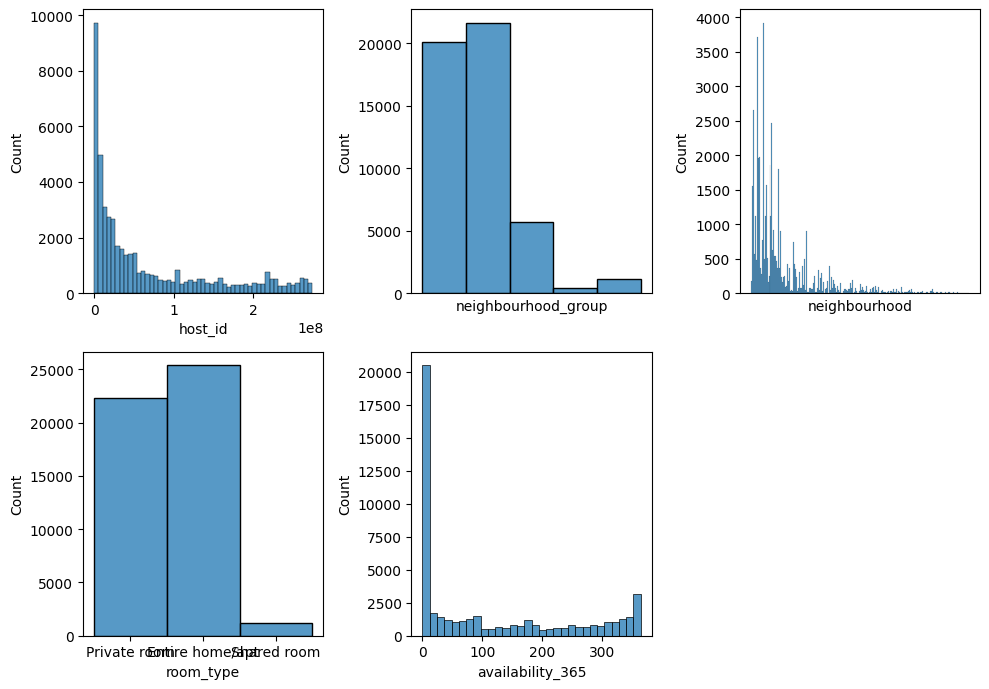

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Histogramas de variables categóricas
sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

plt.tight_layout()

plt.show()

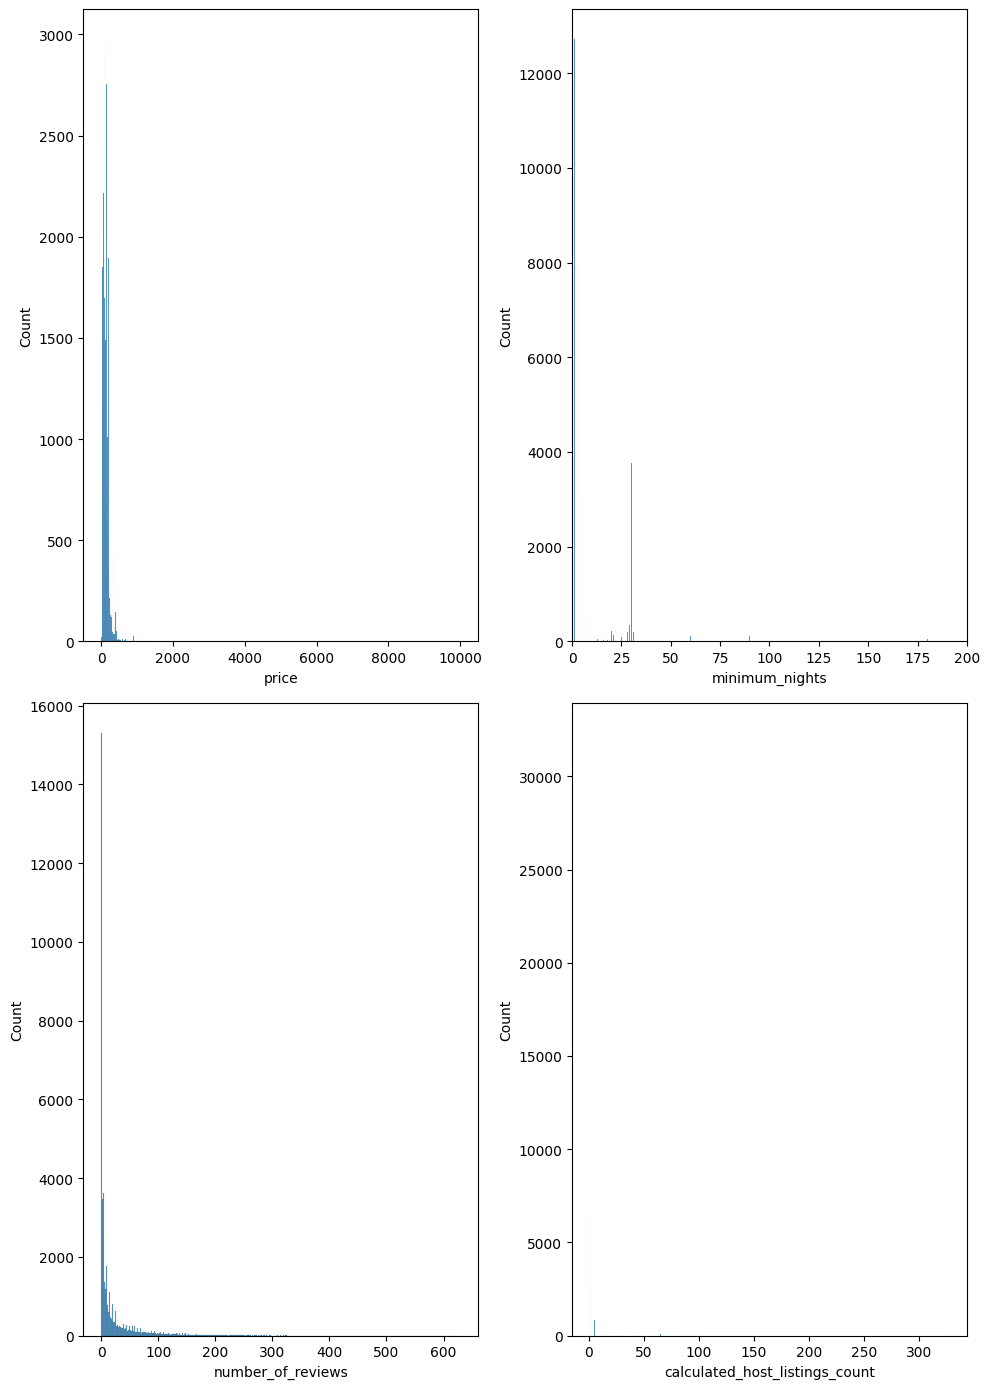

In [8]:
fig, axis = plt.subplots(2, 2, figsize = (10, 14))
#, gridspec_kw = {"height_ratios": [6, 1, 6, 1]}

# Histogramas de variables numéricas

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.histplot(ax = axis[1, 0], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[1, 1], data = total_data, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

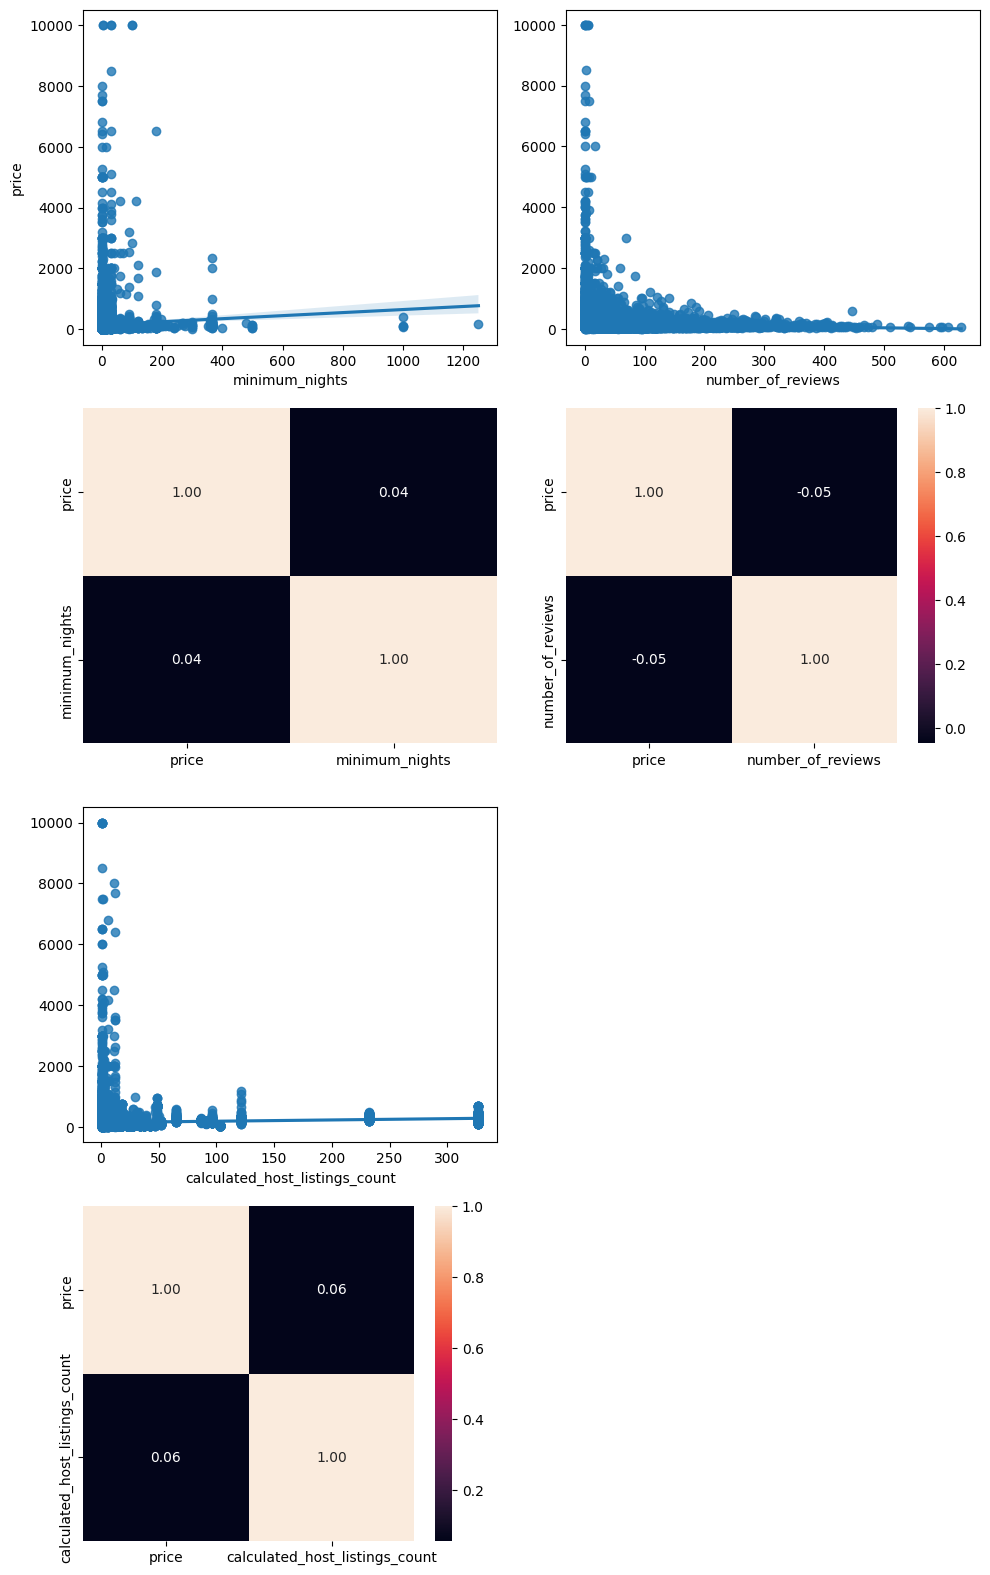

In [9]:
# Análisis de relaciones entre variables


# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot

In [10]:
# No hay propiamente una relacion entre ninguna de las variables de cada cruce.

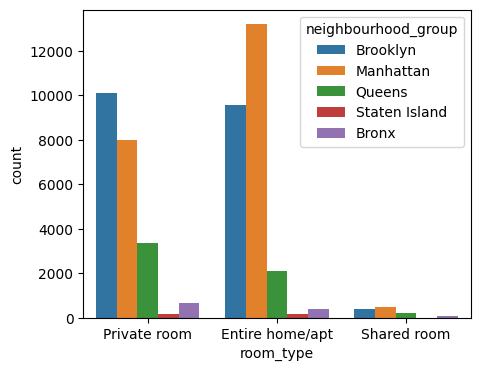

In [11]:
# Analisis relacion de variables categóricas

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

0        0
1        1
2        0
3        1
4        1
        ..
48890    0
48891    0
48892    1
48893    2
48894    0
Name: room_type, Length: 48895, dtype: int64


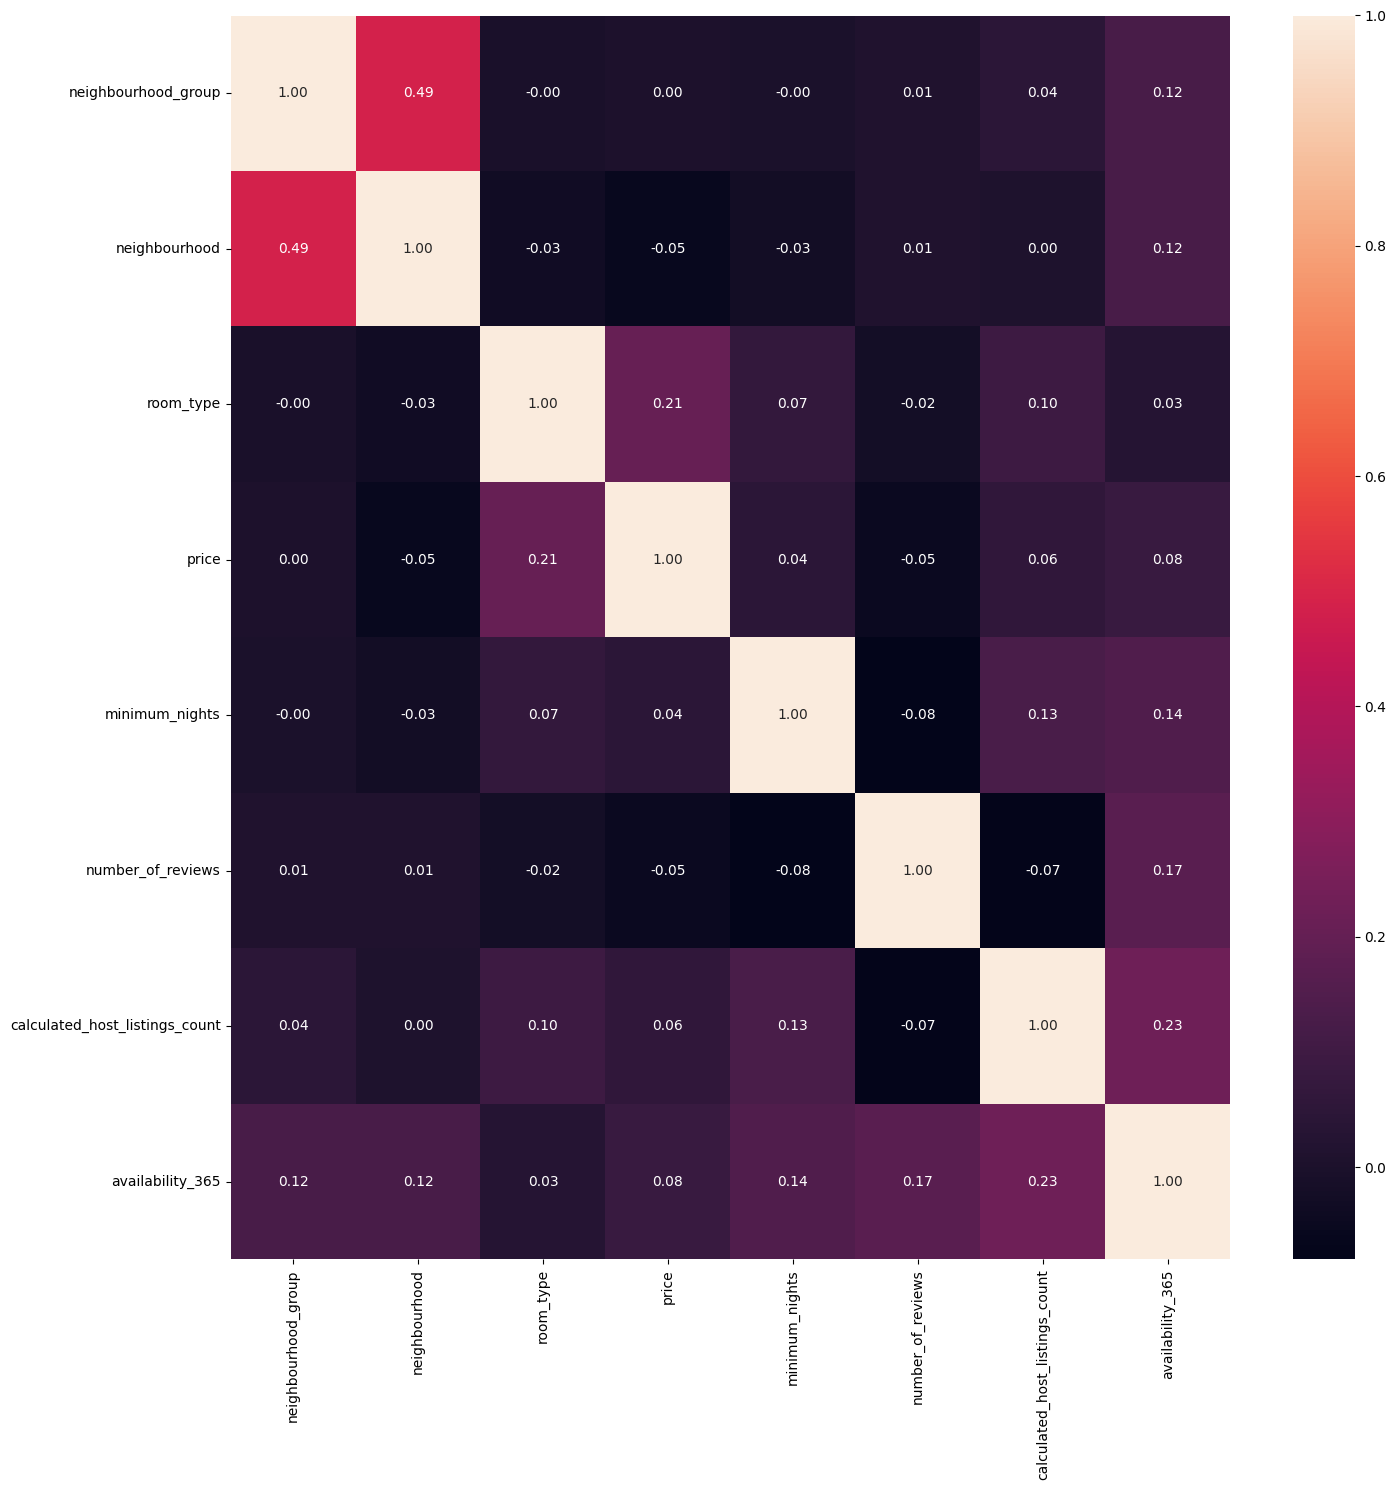

In [12]:
# Factorización 
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
print (total_data["room_type"])
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

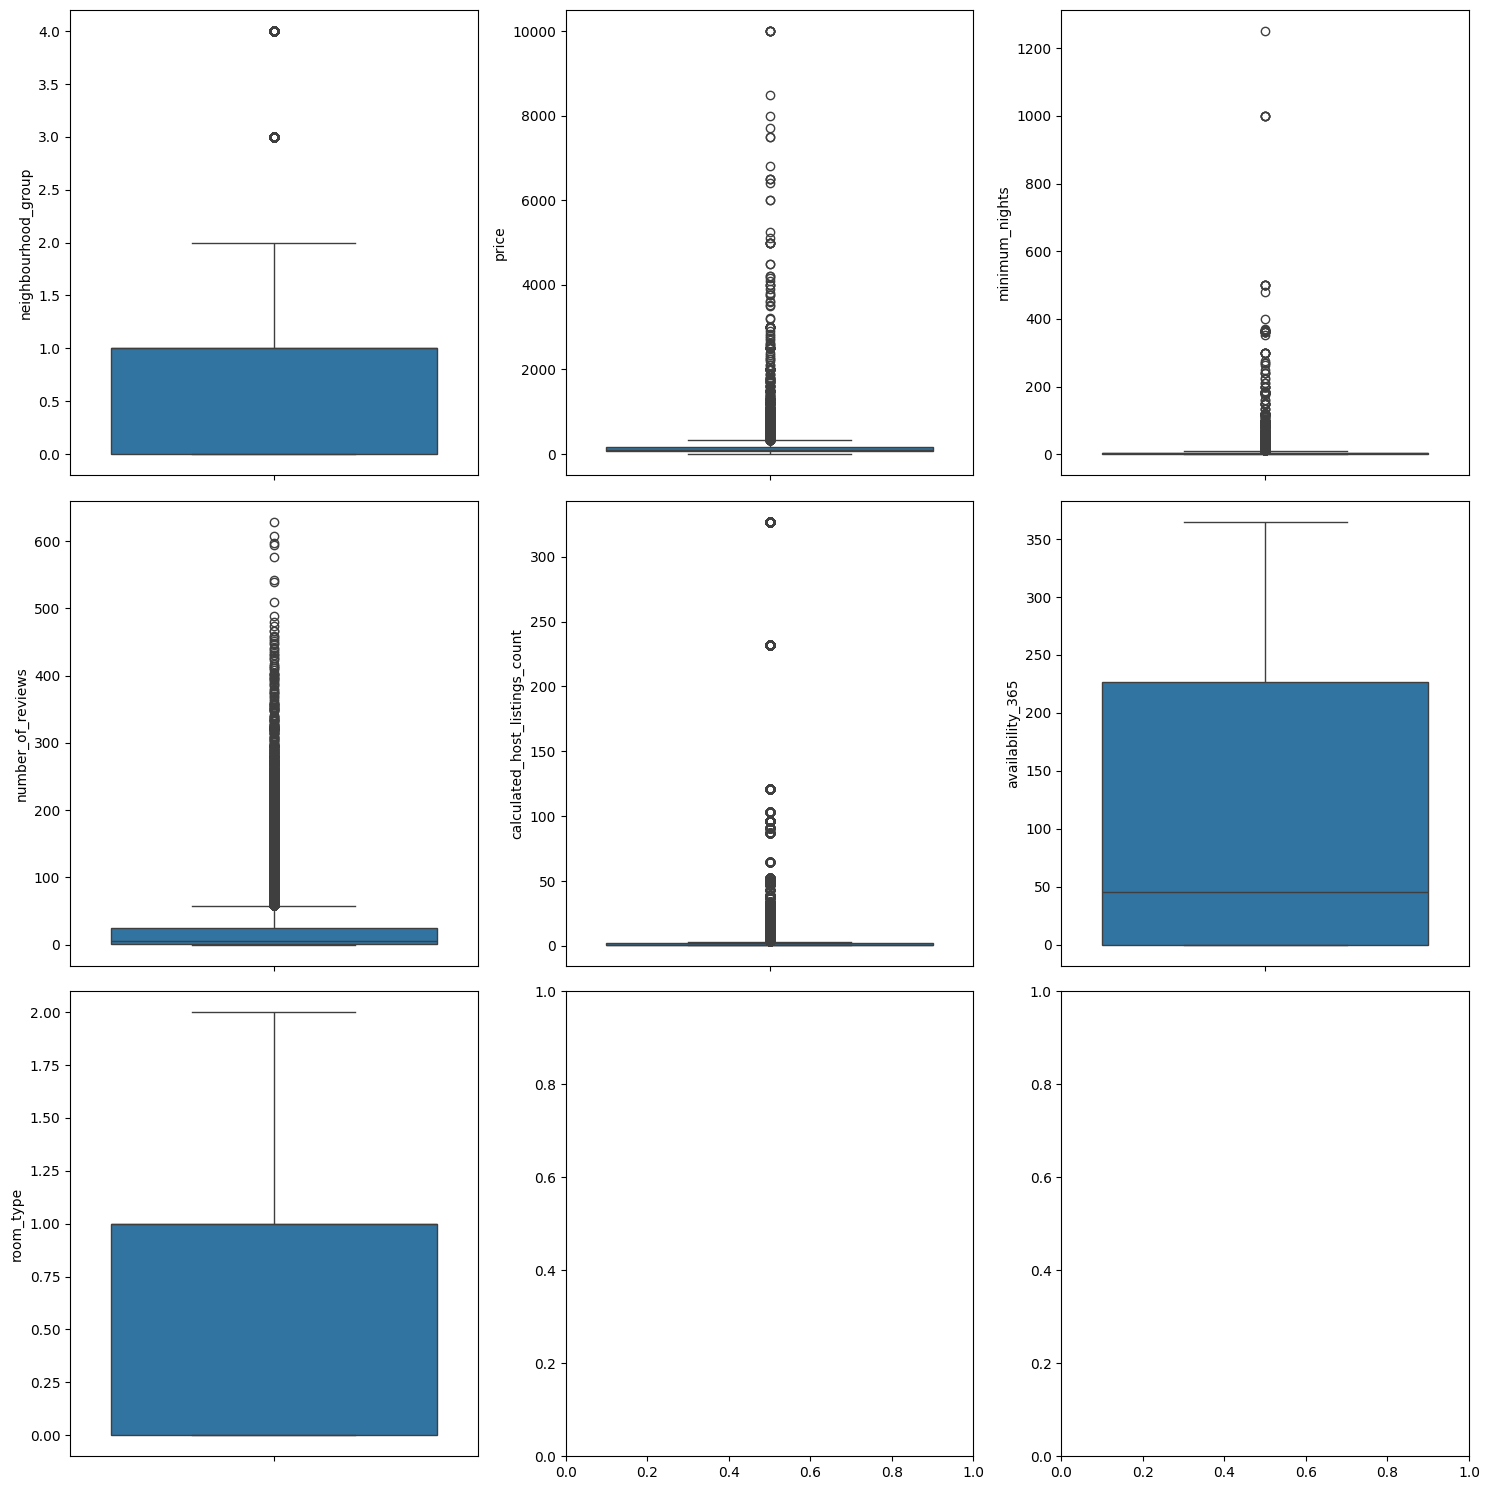

In [13]:
# Análisis Outliers

total_data.describe()

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()

plt.show()

In [23]:
import numpy as np


# Stats for Price
price_stats = total_data["price"].describe()
price_stats

data = total_data["price"]
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = [x for x in data if x < lower_bound or x > upper_bound]
total_data = total_data[(total_data['price'] >= lower_bound) & (total_data['price'] <= upper_bound)]


# Stats for minimum_nights
price_stats = total_data["minimum_nights"].describe()
price_stats

data = total_data["minimum_nights"]
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_minimum_nights = [x for x in data if x < lower_bound or x > upper_bound]
total_data = total_data[(total_data['minimum_nights'] >= lower_bound) & (total_data['minimum_nights'] <= upper_bound)]

# Stats for number_of_reviews
price_stats = total_data["number_of_reviews"].describe()
price_stats

data = total_data["number_of_reviews"]
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_minimum_nights = [x for x in data if x < lower_bound or x > upper_bound]
total_data = total_data[(total_data['number_of_reviews'] >= lower_bound) & (total_data['number_of_reviews'] <= upper_bound)]


# Stats for calculated_host_listings_count
price_stats = total_data["calculated_host_listings_count"].describe()
price_stats

data = total_data["calculated_host_listings_count"]
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_minimum_nights = [x for x in data if x < lower_bound or x > upper_bound]
total_data = total_data[(total_data['calculated_host_listings_count'] >= lower_bound) & (total_data['calculated_host_listings_count'] <= upper_bound)]


In [24]:
# NaN values
total_data.isnull().sum().sort_values(ascending = False)


id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [25]:
# escalado de características

from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
1,0.592105,0.0,0.5,0.972603,0.25,0.5,225
2,0.000000,0.4,0.0,1.000000,0.25,0.0,150
5,0.973684,0.4,0.0,0.353425,0.25,0.5,200
10,0.697368,0.8,0.0,0.016438,0.25,0.5,135
18,0.697368,0.4,0.0,0.057534,0.00,0.5,99


In [26]:
# selección de características

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,0.013158,0.0,1.000000,1.0
1,0.144737,0.5,0.342466,1.0
2,0.000000,0.5,0.364384,0.0
3,0.000000,0.0,0.000000,0.0
4,0.131579,0.0,0.021918,0.5


In [27]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)